## Import Packages

In [1]:
import tensorflow as tf
import PIL
from keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
from PIL import UnidentifiedImageError
from PIL import ImageFile  
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
ImageFile.LOAD_TRUNCATED_IMAGES = True 

## Data Pre-Proccessing

### Check for Improper Image Files 

In [3]:
path = Path("Data/Comprehensive Disaster Dataset(CDD)").rglob("*.png")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

##### All improper image files have already been deleted in the dataset that was uploaded along with this file.  

In [4]:
path = Path("Data/Comprehensive Disaster Dataset(CDD)").rglob("*.png")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)
print("Over!")

Over!


##### Create Training and Validation Sets for the Model

In [5]:
datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split = 0.2,
                                   horizontal_flip = True)
training_set = datagen.flow_from_directory("Data/Comprehensive Disaster Dataset(CDD)",
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 subset='training',
                                                 class_mode = 'categorical')

Found 2917 images belonging to 5 classes.


In [6]:
test_set = datagen.flow_from_directory("Data/Comprehensive Disaster Dataset(CDD)",
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 subset='validation',
                                                 class_mode = 'categorical')

Found 727 images belonging to 5 classes.


In [8]:
# x,y = next(test_set)
# x.shape
# a = training_set.class_indices
# class_names = list(a.keys())
# def plot_images(img, labels):
#     plt.figure(figsize=[10, 10])
#     for i in range(9):
#         plt.subplot(3, 3, i+1)
#         plt.imshow(img[i])
#         plt.title(class_names[np.argmax(labels[i])])
#         plt.axis('off')
 
# plot_images(x,y)

## Building the Convolutional Neural Network

#### Initialising the Convolutional Neural Network

In [7]:
cnn = tf.keras.models.Sequential()

#### Adding the Convolution layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[256,256, 3]))

#### Pooling

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Adding a second convolutional layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Flattening

In [11]:
cnn.add(tf.keras.layers.Flatten())

#### Full Connection

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#### Adding a Dropout layer 

In [13]:
cnn.add(tf.keras.layers.Dropout(0.25))

#### Adding Output Layer

In [14]:
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

#### Summary 

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 128)               1

### Training the Convolutional Neural Network

#### Compiling the Convolutional Neural Network

In [16]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#### Training the CNN on the Training set and evaluating it on the Validation set

In [17]:
model=cnn.fit(x = training_set, validation_data = test_set, epochs = 40)

Epoch 1/40
92/92 [==============================] - 191s 2s/step - loss: 1.9874 - accuracy: 0.5036 - val_loss: 1.2161 - val_accuracy: 0.5612
Epoch 2/40
92/92 [==============================] - 172s 2s/step - loss: 1.1666 - accuracy: 0.5674 - val_loss: 1.3088 - val_accuracy: 0.5475
Epoch 3/40
92/92 [==============================] - 171s 2s/step - loss: 1.1039 - accuracy: 0.5896 - val_loss: 1.2655 - val_accuracy: 0.5241
Epoch 4/40
92/92 [==============================] - 182s 2s/step - loss: 1.0051 - accuracy: 0.6106 - val_loss: 1.1921 - val_accuracy: 0.5186
Epoch 5/40
92/92 [==============================] - 207s 2s/step - loss: 0.9212 - accuracy: 0.6445 - val_loss: 1.0033 - val_accuracy: 0.5860
Epoch 6/40
92/92 [==============================] - 182s 2s/step - loss: 0.8448 - accuracy: 0.6863 - val_loss: 1.0326 - val_accuracy: 0.5928
Epoch 7/40
92/92 [==============================] - 205s 2s/step - loss: 0.8203 - accuracy: 0.6853 - val_loss: 0.9856 - val_accuracy: 0.6231
Epoch 8/40
92

In [18]:
cnn.save('image_classifier.h5')

# Diagnose the Neural Network

### Plotting the Accuracy vs Epochs and Loss vs Epochs Graphs 

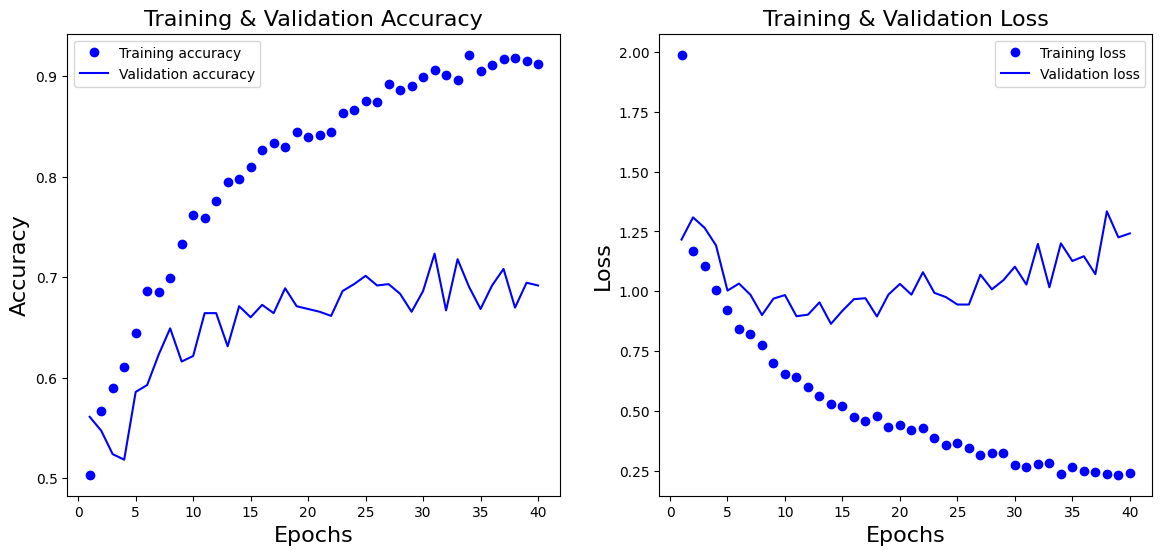

In [19]:
import matplotlib.pyplot as plt
  
history_dict = model.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
  
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss') 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

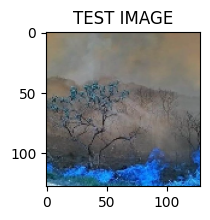

In [11]:
img=cv2.imread("01_02_0033.png")
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
re=cv2.resize(img,(128,128)).reshape(-1,128,128,3)
plt.figure(figsize=(2,2))
plt.title("TEST IMAGE")
plt.imshow(re[0])

In [12]:
model1=tf.keras.models.load_model("image_classifier.h5")
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

predictions = []
img=tf.keras.preprocessing.image.load_img("01_02_0033.png")
img= tf.keras.preprocessing.image.img_to_array(img)
img = tf.keras.preprocessing.image.smart_resize(img, (256,256))
img = tf.reshape(img, (-1, 256,256, 3))

labels=list(training_set.class_indices.keys())

prediction = model1.predict(img/255)

# print(prediction)
# print(labels)
predicted_class_indices=np.argmax(prediction,axis=1)
# print(predicted_class_indices)
predictions = [labels[k] for k in predicted_class_indices]
print(predictions[0])

1/1 [==============================] - 0s 100ms/step
Fire_Disaster
